Diabetes detection using machine learning -> Logistic Regression,Support Vector Machine including Feature selection

In [49]:
import numpy as np                                                 #important library to be used
import pandas as pd                       
from matplotlib import pyplot as plt
import seaborn as sns

In [50]:
%matplotlib inline

In [51]:
dataframe=pd.read_csv('C:\\Users\\ankur\\Downloads\\diabetes.csv')  #reading Dataset and saving in dataframe
dataframe.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [52]:
feature=dataframe.drop('Outcome',axis=1)              #Selecting all columns excluding Outcome

In [53]:
target=dataframe['Outcome']                           #Target is Outcome column
target                                                              

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [54]:
feature.head(5)                                  #feature 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


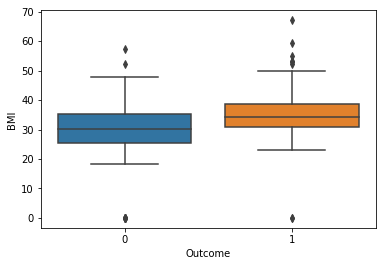

In [55]:
sns.boxplot(target,feature['BMI'])             ##BMI ,higher BMI for diabetic

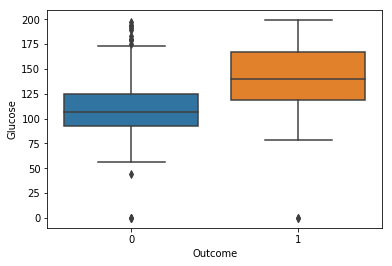

In [56]:
sns.boxplot(target,feature['Glucose'])       ##Glucose ,higher Glucose for diabetic

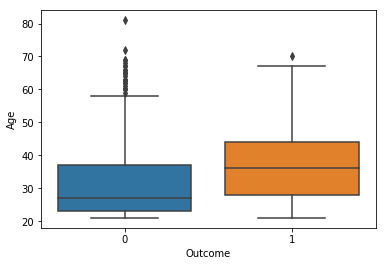

In [57]:
sns.boxplot(target,feature['Age'])       #Age 40-50 are more likely to be diabetic

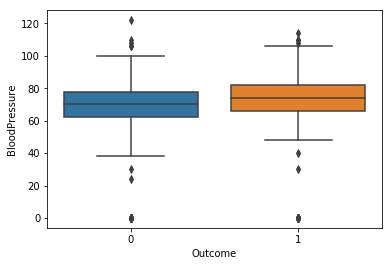

In [58]:
sns.boxplot(target,feature['BloodPressure'])     #No clear classification based on BP

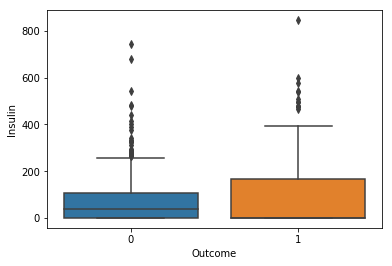

In [59]:
sns.boxplot(target,feature['Insulin'])

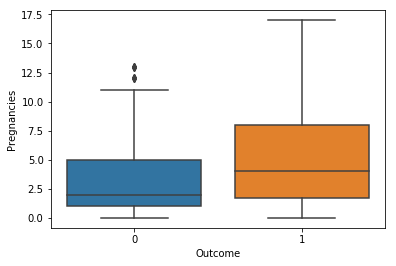

In [60]:
sns.boxplot(target,feature['Pregnancies'])             #More than 5 Pregnancies  are more likely to be diabetic

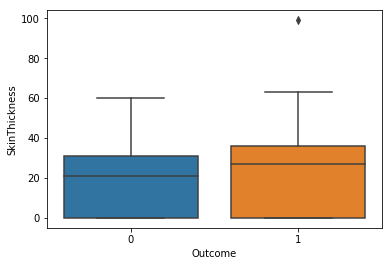

In [61]:
sns.boxplot(target,feature['SkinThickness'])

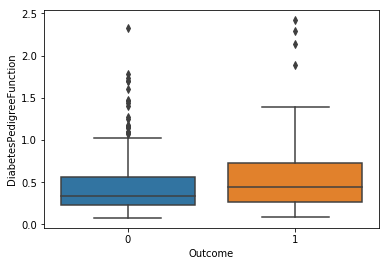

In [62]:
sns.boxplot(target,feature['DiabetesPedigreeFunction'])   # More than 0.5 DPF is supporing for diabetes

## Preprocessing data

In [10]:
feature_array=feature.iloc[:].values
target_array=target.values.reshape(-1,1)
feature_array.shape,target_array.shape

((768, 8), (768, 1))

In [65]:
from sklearn.preprocessing import normalize                      #using normalization for making all data upto some scale

In [80]:
feature_array=normalize(feature_array,norm='l2')

Splitting the data test=24% ,training=76%  using scikit-learn(sklearn)    

In [81]:
from sklearn.model_selection import train_test_split                                          
x_train,x_test,y_train,y_test=train_test_split(feature_array,target_array,test_size=0.24)                  

In [82]:
from sklearn.linear_model import LogisticRegression             #importing Logistic Regression class

In [83]:
LR_first=LogisticRegression()                                #initializing  LogisticRegression class

In [84]:
LR_first

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
LR_first.fit(x_train,y_train)

c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
prediction=LR_first.predict(x_test)

### Importing model evaluation metrics like confusion Matrix,accuracy,recall using sklearn.metrics

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score    

In [88]:
TN,FP,FN,TP=confusion_matrix(y_test,prediction).ravel()
print('TN=%d \nFP=%d \nFN=%d \nTP=%d'%(TN,FP,FN,TP))

TN=115 
FP=6 
FN=62 
TP=2


In [89]:
accuracy=accuracy_score(y_test,prediction)  
accuracy
#(104+35)/(109+31+7+38)

0.6324324324324324

In [90]:
recall_score(y_test,prediction)
#35/(35+31)

0.03125

In [92]:
feature_array[0]

array([0.03355237, 0.82762513, 0.40262844, 0.19572216, 0.        ,
       0.18789327, 0.00350622, 0.27960308])

In [78]:
LR_first.predict(feature[0:9])

array([0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [79]:
target[0:9]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
Name: Outcome, dtype: int64

In [63]:
x=np.array([[0,125,72,35,0,33.6,0.6,30]])               ## making prediction by user input

In [64]:
LR_first.predict(x)

array([0], dtype=int64)

## After selecting  Glucose,BloodPressure,BMI,Age

In [136]:
Dataframe_New=pd.DataFrame({'Pregnancies':dataframe.Pregnancies ,'Glucose':dataframe.Glucose,'BloodPressure':dataframe.BloodPressure,'BMI':dataframe.BMI,'DPF':dataframe.DiabetesPedigreeFunction,'Age':dataframe.Age})

In [137]:
Dataframe_New

,Pregnancies,Glucose,BloodPressure,BMI,DPF,Age
0,6,148,72,33.6,0.627,50
1,1,85,66,26.6,0.351,31
2,8,183,64,23.3,0.672,32
3,1,89,66,28.1,0.167,21
4,0,137,40,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63
764,2,122,70,36.8,0.340,27
765,5,121,72,26.2,0.245,30
766,1,126,60,30.1,0.349,47


In [241]:
"""feature_array=Dataframe_New.iloc[:].values
target_array=target.values.reshape(-1,1)
"""
feature_array=dataframe.iloc[:].values
target_array=target.values.reshape(-1,1)
dataframe.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [443]:
x1_train,x1_test,y1_train,y1_test=train_test_split(feature_array[:,1:2],target_array,test_size=0.28,random_state=2)
x1_train

array([[114.],
       [125.],
       [167.],
       [196.],
       [189.],
       [ 99.],
       [111.],
       [ 94.],
       [ 97.],
       [173.],
       [ 87.],
       [105.],
       [162.],
       [115.],
       [ 92.],
       [ 84.],
       [118.],
       [ 92.],
       [158.],
       [139.],
       [134.],
       [ 95.],
       [ 71.],
       [130.],
       [112.],
       [118.],
       [146.],
       [105.],
       [151.],
       [132.],
       [124.],
       [ 87.],
       [102.],
       [167.],
       [108.],
       [ 87.],
       [156.],
       [ 78.],
       [179.],
       [ 99.],
       [122.],
       [ 91.],
       [131.],
       [109.],
       [ 91.],
       [ 96.],
       [152.],
       [105.],
       [122.],
       [ 84.],
       [126.],
       [104.],
       [ 95.],
       [150.],
       [122.],
       [107.],
       [117.],
       [ 90.],
       [ 90.],
       [111.],
       [176.],
       [ 85.],
       [100.],
       [174.],
       [ 84.],
       [129.],
       [19

In [444]:
x1_train.shape,y1_train.shape

((552, 1), (552, 1))

In [445]:
LR_second=LogisticRegression()

In [446]:
LR_second.fit(x1_train,y1_train)

c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [447]:
LR_sec_prediction=LR_second.predict(x1_test)

In [448]:
TN,FP,FN,TP=confusion_matrix(y1_test,LR_sec_prediction).ravel()
print('TN=%d \nFP=%d \nFN=%d \nTP=%d'%(TN,FP,FN,TP))

TN=134 
FP=13 
FN=39 
TP=30


In [449]:
accuracy_score(y1_test,LR_sec_prediction)

0.7592592592592593

In [450]:
recall_score(y1_test,LR_sec_prediction)

0.43478260869565216

## USING SVM

In [420]:
from sklearn.svm import LinearSVC

In [421]:
svm_clf=LinearSVC()

In [422]:
svm_clf.fit(x1_train,y1_train)

c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [423]:
svf_predict=svm_clf.predict(x1_test)

In [424]:
accuracy_score(y1_test,svf_predict)

0.6428571428571429

In [425]:
recall_score(y1_test,svf_predict)

0.0

In [426]:
TN,FP,FN,TP=confusion_matrix(y1_test,svf_predict).ravel()
print('TN=%d \nFP=%d \nFN=%d \nTP=%d'%(TN,FP,FN,TP))

TN=99 
FP=0 
FN=55 
TP=0


result
svm accuracy-41%
sv recall=97%
Logistic_accuracy-78%
Logistic_recall-54%

In [25]:
from sklearn.preprocessing import normalize as N

In [41]:
list1=

In [48]:
a=np.array([[14,5,58],[15,6,40]])
N(a)

array([[0.23382097, 0.08350749, 0.96868687],
       [0.34771071, 0.13908429, 0.92722857]])

In [135]:
for x in dataframe.columns:
    z=np.corrcoef(dataframe[x],dataframe['Outcome'])
    print('Correlation coefficient between %s and Outcome is %f'%(x,z[0][1]))

Correlation coefficient between Pregnancies and Outcome is 0.221898
Correlation coefficient between Glucose and Outcome is 0.466581
Correlation coefficient between BloodPressure and Outcome is 0.065068
Correlation coefficient between SkinThickness and Outcome is 0.074752
Correlation coefficient between Insulin and Outcome is 0.130548
Correlation coefficient between BMI and Outcome is 0.292695
Correlation coefficient between DiabetesPedigreeFunction and Outcome is 0.173844
Correlation coefficient between Age and Outcome is 0.238356
Correlation coefficient between Outcome and Outcome is 1.000000


In [235]:
final=[]
for x in dataframe.columns:
    matrix=[]
    for y in dataframe.columns:
        z=np.corrcoef(dataframe[x],dataframe[y])
        matrix.append(z[0][1])
    final.append(matrix)
   # matrix.append(mat)
#matrix=np.array(matrix).reshape(len(dataframe.columns),len(dataframe.columns))
np.sort(final)
#matrix.size

array([[-0.08167177, -0.07353461, -0.03352267,  0.01768309,  0.12945867,
         0.14128198,  0.22189815,  0.54434123,  1.        ],
       [ 0.05732789,  0.12945867,  0.1373373 ,  0.15258959,  0.22107107,
         0.26351432,  0.33135711,  0.4665814 ,  1.        ],
       [ 0.04126495,  0.06506836,  0.08893338,  0.14128198,  0.15258959,
         0.20737054,  0.23952795,  0.28180529,  1.        ],
       [-0.11397026, -0.08167177,  0.05732789,  0.07475223,  0.18392757,
         0.20737054,  0.3925732 ,  0.43678257,  1.        ],
       [-0.07353461, -0.04216295,  0.08893338,  0.13054795,  0.18507093,
         0.19785906,  0.33135711,  0.43678257,  1.        ],
       [ 0.01768309,  0.03624187,  0.14064695,  0.19785906,  0.22107107,
         0.28180529,  0.29269466,  0.3925732 ,  1.        ],
       [-0.03352267,  0.03356131,  0.04126495,  0.1373373 ,  0.14064695,
         0.17384407,  0.18392757,  0.18507093,  1.        ],
       [-0.11397026, -0.04216295,  0.03356131,  0.03624187,  0

TypeError: index() takes at least 1 argument (0 given)

In [207]:
l.append(5)

In [208]:
l

[5, 5]

In [319]:
x=[4,5,6,5]

In [464]:
diabetic=dataframe[dataframe['Outcome']==1]
diabetic_non=dataframe[dataframe['Outcome']==0]

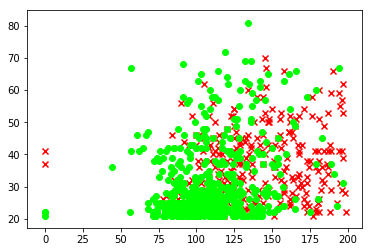

In [472]:
plt.scatter(diabetic['Glucose'],diabetic['Age'],color='red',marker='x')
plt.scatter(diabetic_non['Glucose'],diabetic_non['Age'],color='lime')


(array([197., 571.]),
 array([  0. ,  99.5, 199. ]),
 <a list of 2 Patch objects>)

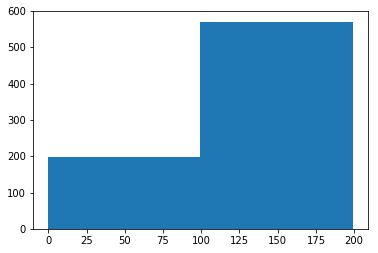

In [411]:
plt.hist(dataframe['Glucose'],bins=2)

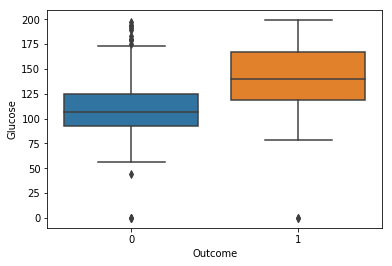

In [453]:
sns.boxplot(dataframe['Outcome'],dataframe['Glucose'])